## EDA: iris dataset - part 3: PCA

PCA allows to reduce our datasets dimensions without sacrificing too much information. Note: PCA is a linear combination of features and tries to maximise the variance. The first PC will be the direction of maximum variance, the second one is orthogonal to that.

First, import the dependencies:

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

Then import our data set as iris:

In [2]:
iris = pd.read_csv(r"C:\Users\Startklar\Desktop\DSA103_Repo\DSA103\python-chemistry-intro\src\dsa103\lecture 7\DSA_iris_cleaned.csv")
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1. Separate (numerical) features for PCA from the targets ("species"):

In [3]:
X = iris.drop(["species"], axis=1)
y = iris["species"]

2. Standardise (substract mean and divide by std. deviation)

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3. Apply PCA (specify the targeted number of dimensions)

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

4. Combine for plotting

In [6]:
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["target"] = y

5. Visualize as scatter plot

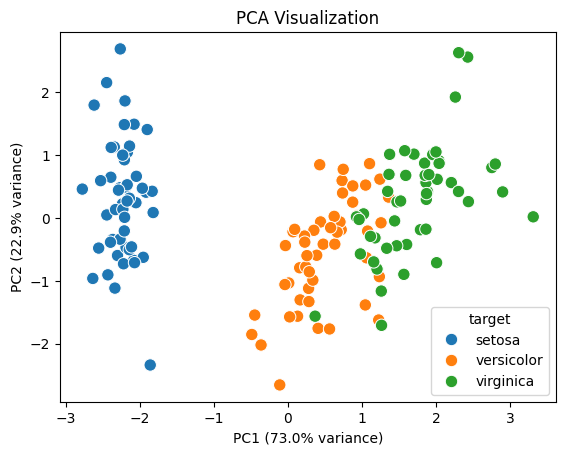

In [7]:
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="target", s=80)
plt.title("PCA Visualization")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.show()

Compare that with the scatter plots of the untransformed iris data:

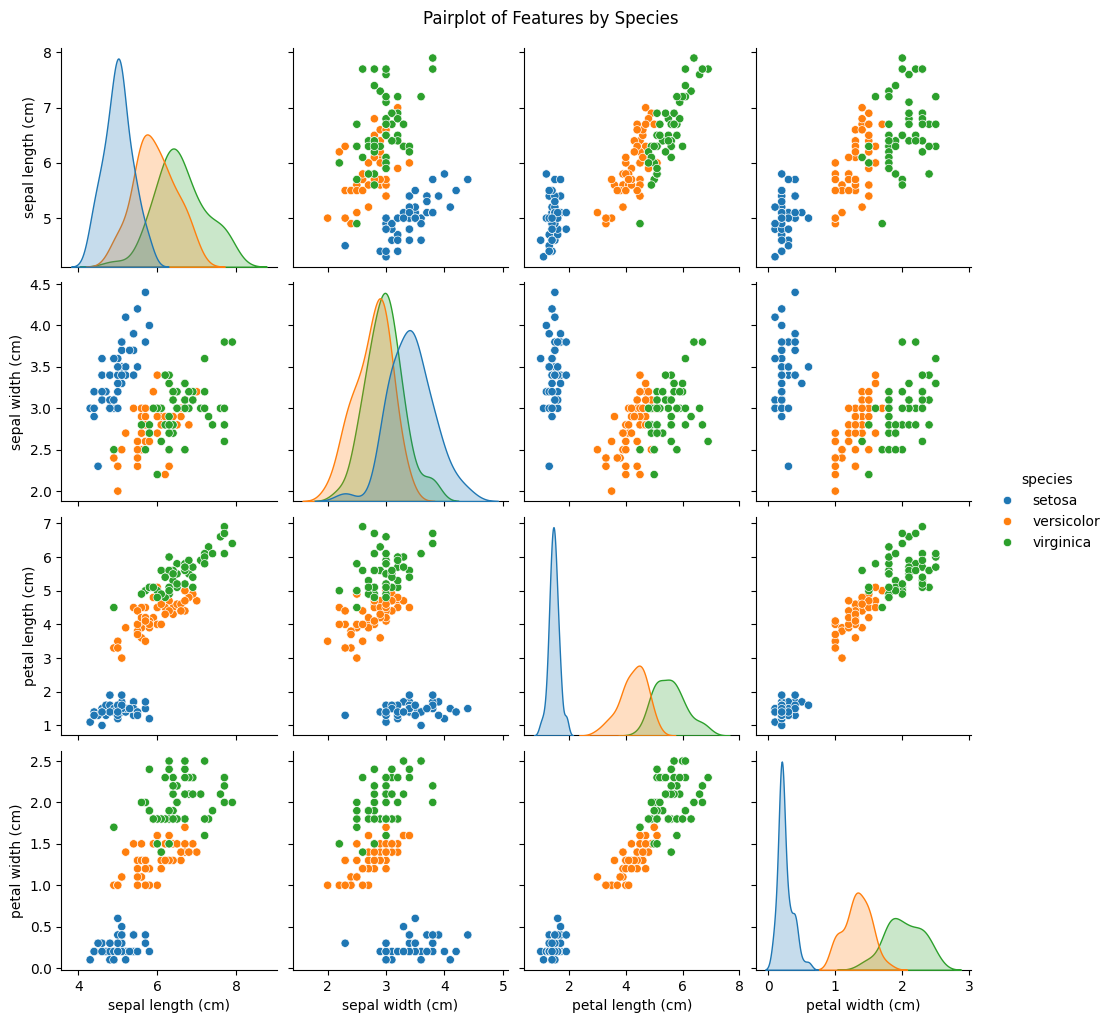

In [8]:
sns.pairplot(iris, hue='species', diag_kind='kde')
plt.suptitle('Pairplot of Features by Species', y=1.02)
plt.show()